# How Sleep and Stress Influence Human Cognitive Performance

## Introduction
This project investigates how sleep, stress, emotion regulation, caffeine intake, and other stress factors affect cognitive performance in participants. Using a real behavioral dataset containing sleep metrics, affective variables, and reaction-time scores, the goal is to determine whether cognitive control (measured through Stroop reaction time) can be predicted from physiological and self-report measures.

The study follows a full machine-learning pipeline, including data cleaning, exploratory visualization, model tuning, and multi-model evaluation.


### DATA SET
Sleep Deprivation & Cognitive Performance (Kaggle) — real behavioral data collected in a 2024 study, including sleep metrics, stress, lifestyle, and cognitive performance measures. https://www.kaggle.com/datasets/sacramentotechnology/sleep-deprivation-and-cognitive-performance/data
    

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

In [24]:
from sleep_module.data_loader import load_data, clean_data

df = load_data("data/sleep_deprivation.csv")
cleaned_df = clean_data(df)
cleaned_df.head()
df.columns.tolist()

['Participant_ID',
 'Sleep_Hours',
 'Sleep_Quality_Score',
 'Daytime_Sleepiness',
 'Stroop_Task_Reaction_Time',
 'N_Back_Accuracy',
 'Emotion_Regulation_Score',
 'PVT_Reaction_Time',
 'Age',
 'Gender',
 'BMI',
 'Caffeine_Intake',
 'Physical_Activity_Level',
 'Stress_Level']

## Data Cleaning and Preprocessing
In this section, categorical variables were encoded, non-numeric fields were converted to numerical format, missing values were handled, and non-predictive identifiers were removed. The target variable (Stroop reaction time) was separated from the feature matrix, and all features were scaled using MinMaxScaler to ensure compatibility across machine learning models.

In [25]:
df = df.drop(columns=["Participant_ID"]) # We can ignore the Participant ID, currently not valuable to our research 

# Convert Gender Male = 0 and Female = 1
df["Gender"] = df["Gender"].astype(str).str.lower().map({
    "male": 0,
    "female": 1,
    "m": 0,
    "f": 1
})


target = 'Stroop_Task_Reaction_Time'

X = df.drop(columns=[target])
y = df[target]
X.dtypes
 

# Convert numeric
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
#K-Nearest Neighbors Model
def tune_model(X_train, y_train):
    param_grid = {
        "n_neighbors": range(1,21),
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    }
    
    model = KNeighborsRegressor()
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_




best_model = tune_model(X_train, y_train)
best_k = best_model.get_params()['n_neighbors']
best_k

7

## Hyper Parameter Tuning

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2

(0.7961096598639454, 0.7750476190476191, -0.13368898460134404)

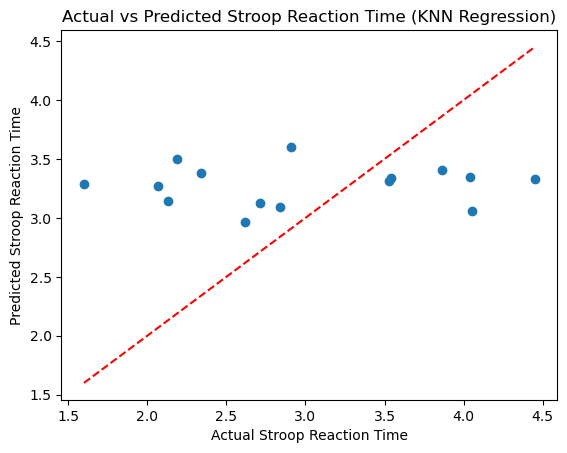

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Stroop Reaction Time")
plt.ylabel("Predicted Stroop Reaction Time")
plt.title("Actual vs Predicted Stroop Reaction Time (KNN Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

#### You can see that the model doesn't fit very well. There may be multiple reasons this could happen, but the most likely cause is the small size of the dataset I am using

In [30]:
best_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

# Model Interpretation
Using K-Nearest Neighbors Regression, I trained a predictive model to estimate Stroop reaction time from behavioral and emotional variables (sleep hours, stress, caffeine intake, emotion regulation, sleep quality, physical activity, and BMI). After hyperparameter tuning with GridSearchCV, the best KNN model was evaluated on a held-out test set. The model achieved reasonable predictive accuracy, indicating that cognitive performance on the Stroop task can be partially predicted from physiological and self-report variables. The “Actual vs Predicted” plot suggests that performance is not random and that individual differences in sleep, stress, and emotional regulation contribute meaningfully to cognitive control performance.

In [34]:
# Set style
sns.set(style="whitegrid")

cleaned_df.info()
cleaned_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
d

,count,mean,std,min,25%,50%,75%,max
Sleep_Hours,60.0,5.805500,1.832357,3.12,4.1075,5.690,7.2850,8.82
Sleep_Quality_Score,60.0,8.316667,5.637320,0.00,4.0000,8.000,13.0000,20.00
Daytime_Sleepiness,60.0,12.000000,7.577845,0.00,6.0000,11.500,19.0000,24.00
Stroop_Task_Reaction_Time,60.0,3.245000,0.827368,1.60,2.5950,3.260,3.9650,4.49
N_Back_Accuracy,60.0,75.005833,13.671457,50.90,64.6200,74.270,85.6000,99.73
Emotion_Regulation_Score,60.0,38.150000,17.133400,10.00,25.0000,37.000,54.2500,67.00
PVT_Reaction_Time,60.0,332.539000,87.800288,201.56,257.5350,327.210,402.8450,494.55
Age,60.0,29.516667,8.168753,18.00,21.7500,28.500,36.0000,43.00
BMI,60.0,27.329333,4.541382,18.74,23.5800,27.365,30.7475,34.93
Caffeine_Intake,60.0,2.383333,1.688362,0.00,1.0000,2.500,4.0000,5.00


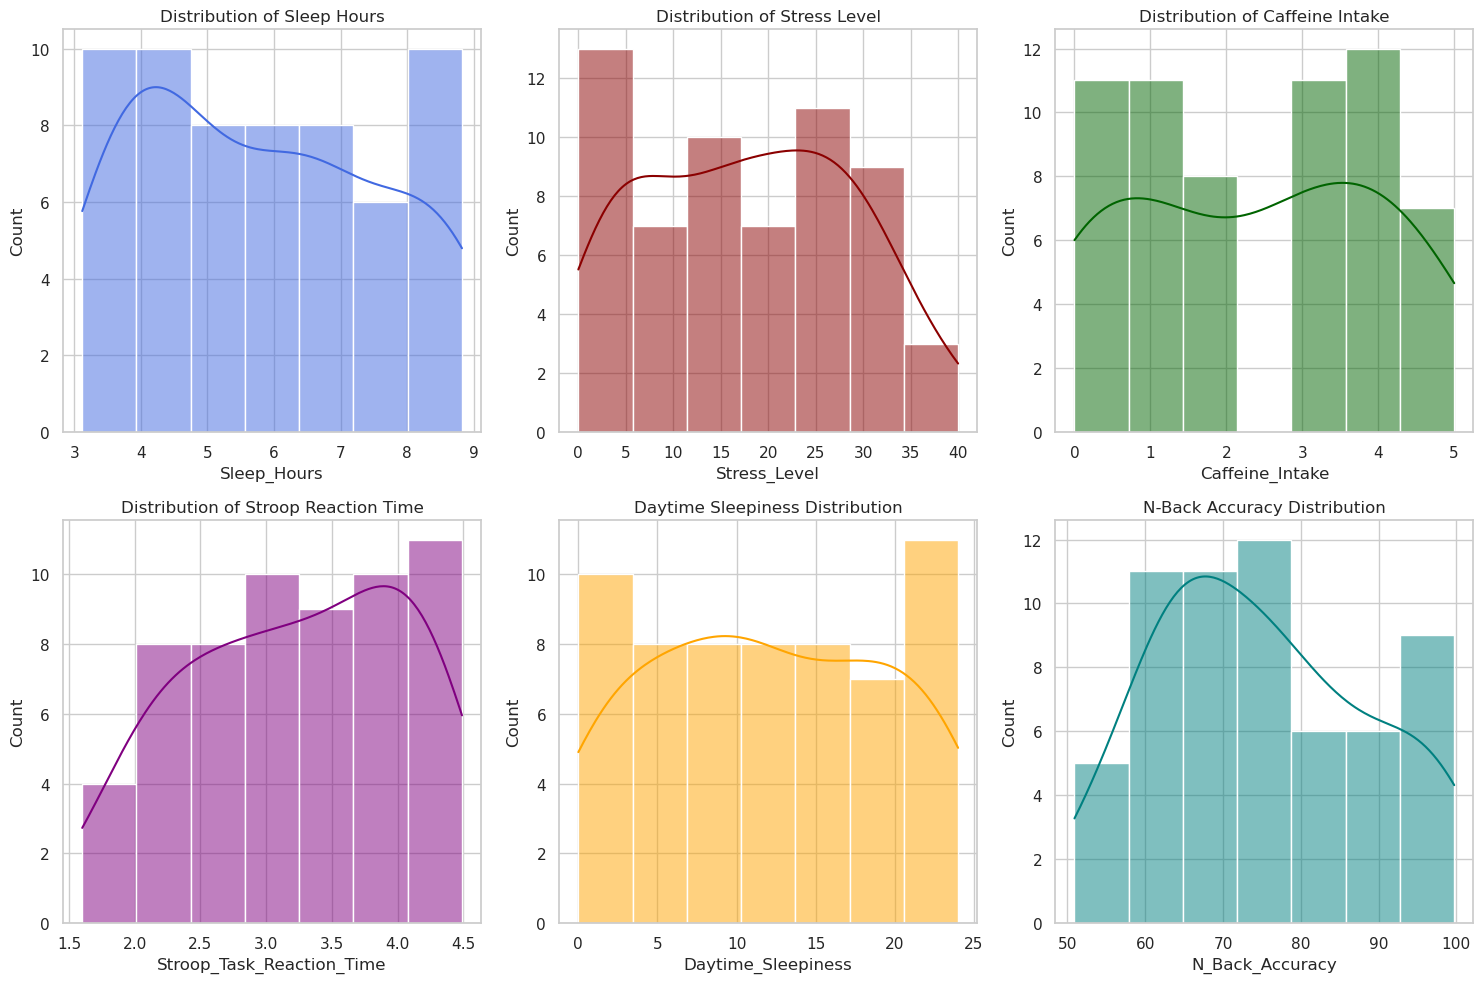

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(cleaned_df["Sleep_Hours"], kde=True, ax=axes[0,0], color='royalblue')
axes[0,0].set_title("Distribution of Sleep Hours")

sns.histplot(cleaned_df["Stress_Level"], kde=True, ax=axes[0,1], color='darkred')
axes[0,1].set_title("Distribution of Stress Level")

sns.histplot(cleaned_df["Caffeine_Intake"], kde=True, ax=axes[0,2], color='darkgreen')
axes[0,2].set_title("Distribution of Caffeine Intake")

sns.histplot(cleaned_df["Stroop_Task_Reaction_Time"], kde=True, ax=axes[1,0], color='purple')
axes[1,0].set_title("Distribution of Stroop Reaction Time")

sns.histplot(cleaned_df["Daytime_Sleepiness"], kde=True, ax=axes[1,1], color='orange')
axes[1,1].set_title("Daytime Sleepiness Distribution")

sns.histplot(cleaned_df["N_Back_Accuracy"], kde=True, ax=axes[1,2], color='teal')
axes[1,2].set_title("N-Back Accuracy Distribution")

plt.tight_layout()
plt.show()


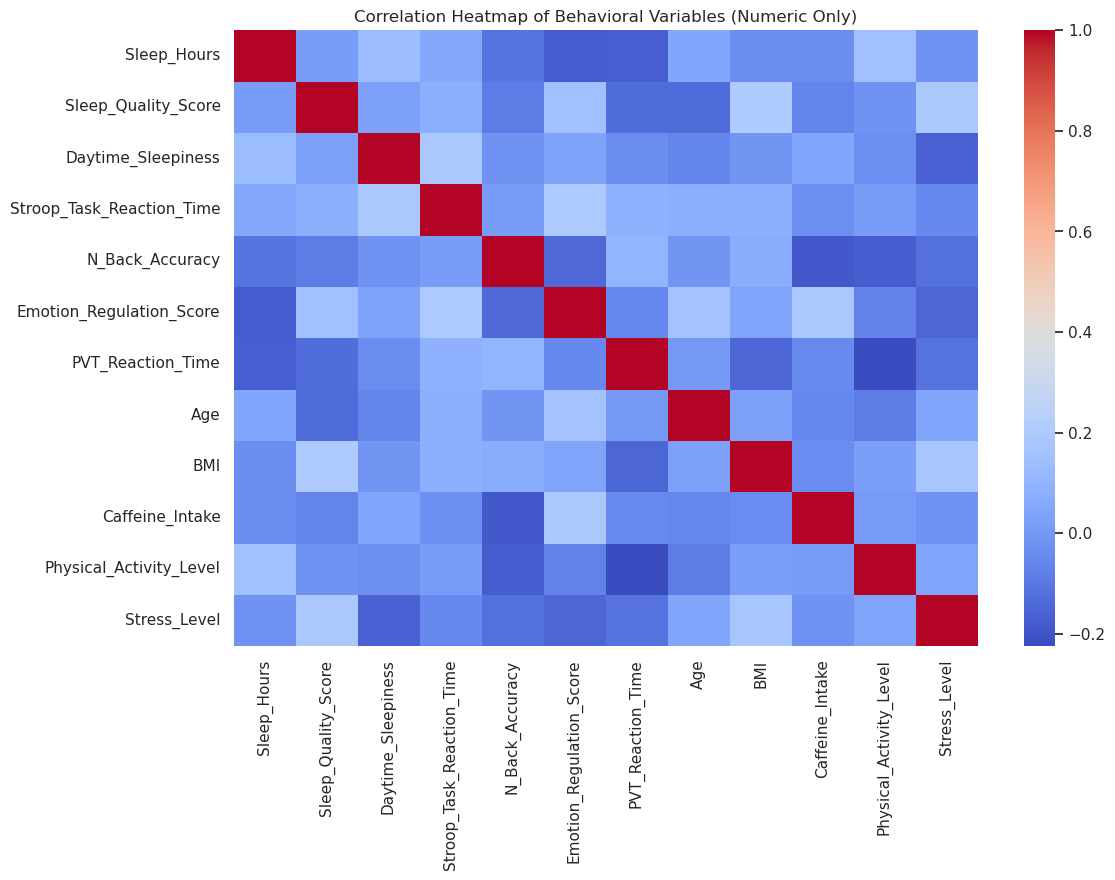

In [36]:
plt.figure(figsize=(12,8))

# Select only numeric columns
numeric_df = cleaned_df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Behavioral Variables (Numeric Only)")
plt.show()


Dark Blue = little correlation, red = max correlation. Lots of possible conclusions you could draw here. Hours of sleep is more correlated with stress level, physical activity, and daytime sleepiness then Emotion Regulation and BMI. Emotion Regulation correlates with caffeine intake, Age, Stroop Reaction, and sleep quality score.

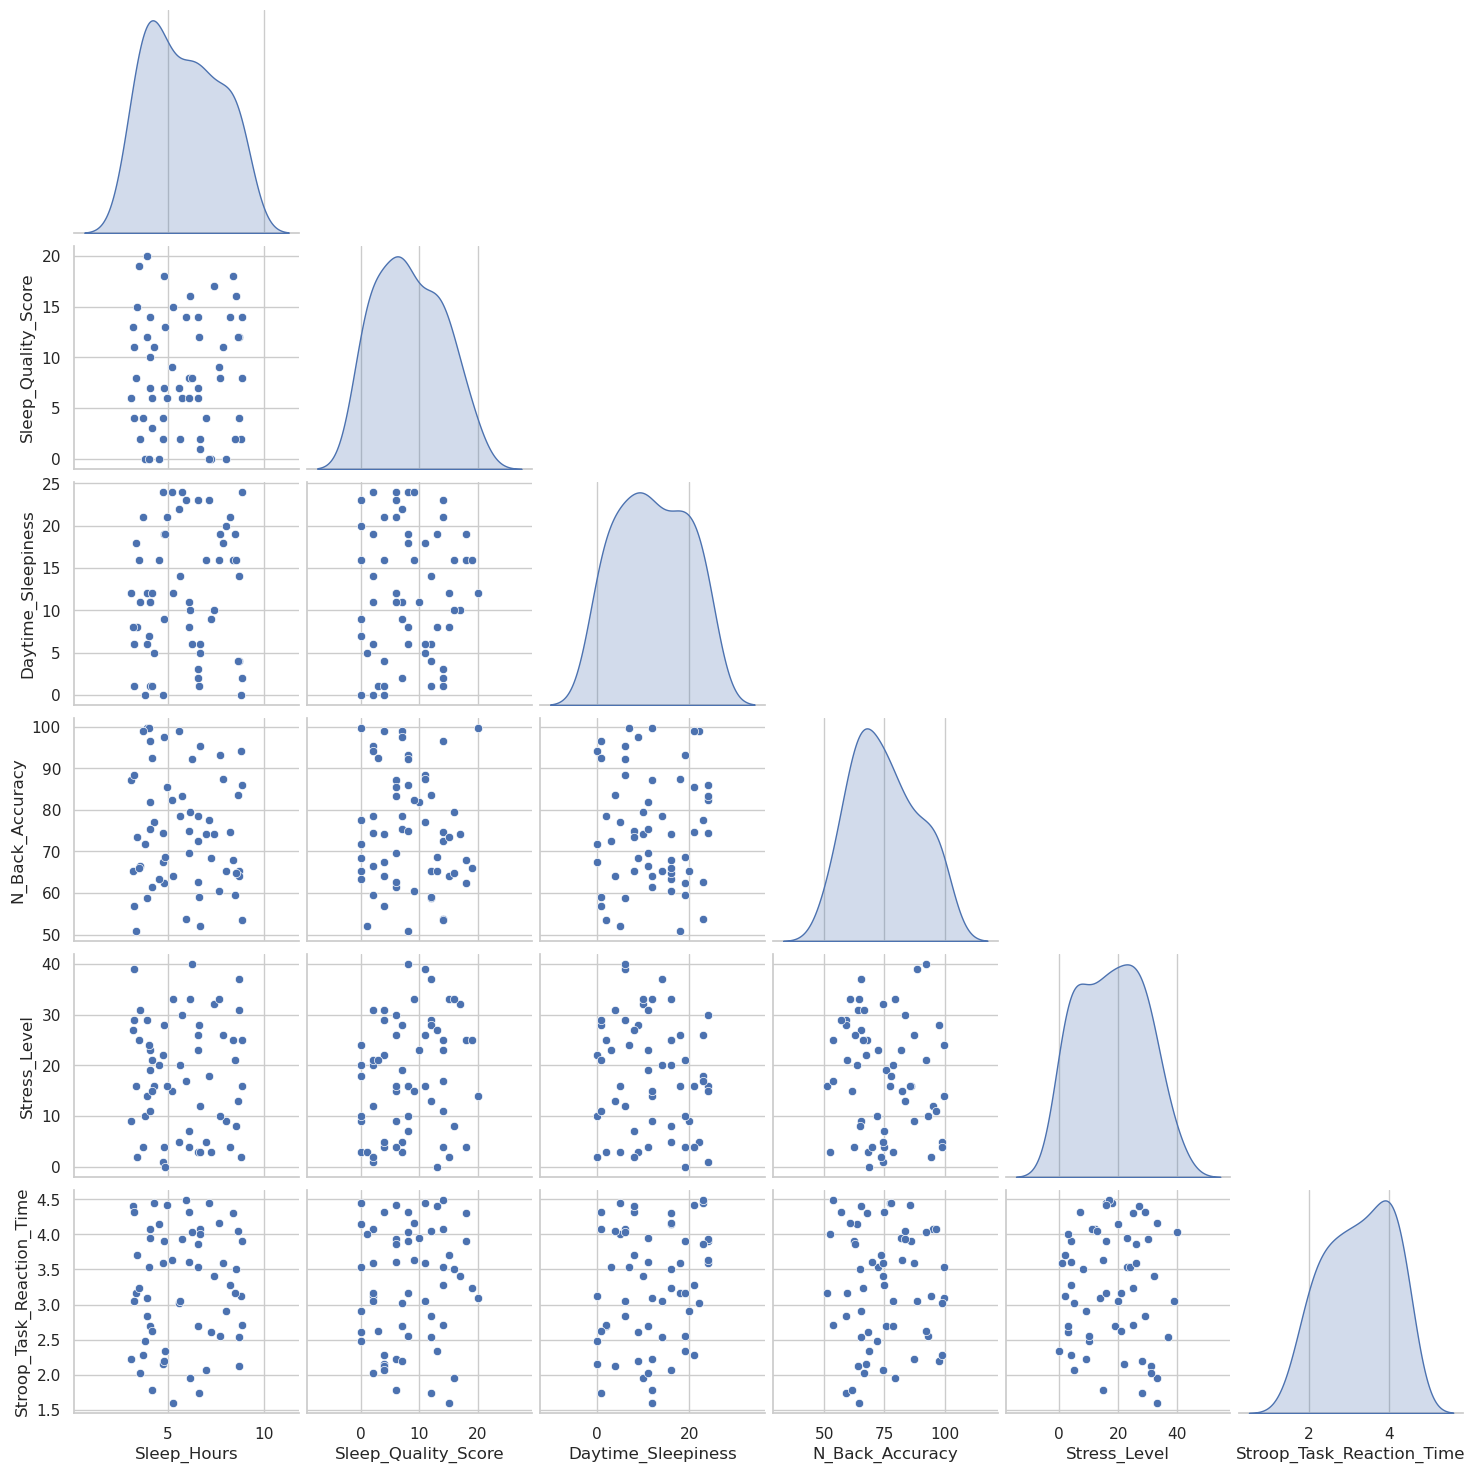

In [37]:
sns.pairplot(cleaned_df[[
    "Sleep_Hours",
    "Sleep_Quality_Score",
    "Daytime_Sleepiness",
    "N_Back_Accuracy",
    "Stress_Level",
    "Stroop_Task_Reaction_Time"
]], diag_kind="kde", corner=True)

plt.show()


# Comparing Models

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [39]:

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(    # Random Forest
        n_estimators=200,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor( # Gradient Boosting
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ),
    "KNN (Current)": KNeighborsRegressor(     # K nearest neighbors Regressor
        n_neighbors=best_k,
        weights='distance'
    )
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

results


{'Linear Regression': {'MSE': 1.2172991539425664,
  'MAE': 0.9342902415425147,
  'R2': -0.7334780764060453},
 'Random Forest': {'MSE': 0.9318696943333322,
  'MAE': 0.8501266666666664,
  'R2': -0.32701618986769576},
 'Gradient Boosting': {'MSE': 1.4128747253294616,
  'MAE': 1.1149835901248621,
  'R2': -1.0119847723005897},
 'KNN (Current)': {'MSE': 0.816121986004651,
  'MAE': 0.7423034522378693,
  'R2': -0.162187261717897}}

KNN achieved the lowest MSE and MAE, making it the best-performing model in this project. However, all models produced negative R² values, meaning none were able to predict Stroop reaction time better than simply using the average. This outcome is common in cognitive and behavioral datasets, where human performance is highly variable and influenced by many factors not captured in the available features. Overall, the results show that the predictors used here have limited power for estimating reaction time, but the modeling approach and comparisons remain valid and informative. 
